### Performing the `Function Transformer` using 
    - Log Transform
    - Reciporcal Transform
    - Square Transform
    - Square Root Transform

In [1]:
#@ Importing the datset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
#@ Loading the dataset
data = pd.read_csv('titanic_dataset.csv', usecols = ['Age', 'Fare', 'Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
# Checking that if we have missing values or not
data.isnull().sum()
#Here, we have some missing values. So replacing those missing values by getting mean value
data['Age'].fillna(data['Age'].mean(), inplace = True)

In [4]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [5]:
# Extracting the X and y for train/test/split
X = data.iloc[:,1:3]
y = data.iloc[:,0]

In [6]:
#@ Performing train/test/split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

C:\Python10\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


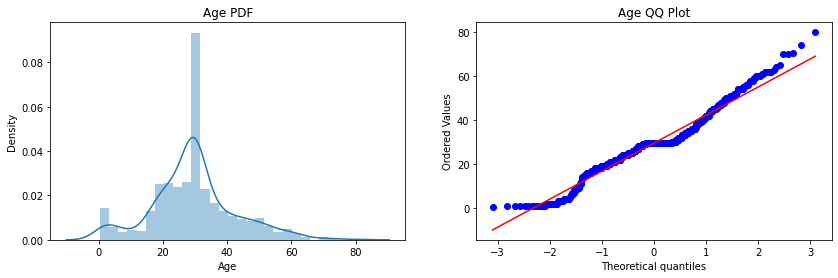

In [7]:
# By plotting the graph, verifying that our data is normally distributed or not
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist = 'norm', plot = plt)
plt.title('Age QQ Plot')

plt.show()

C:\Python10\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


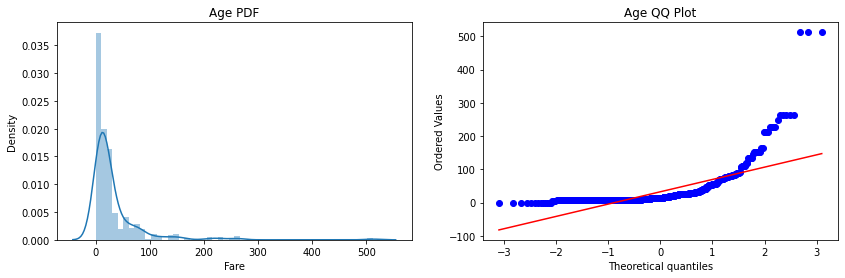

In [8]:
# By plotting the graph for fare column, verifying that our data is normally distributed or not
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist = 'norm', plot = plt)
plt.title('Age QQ Plot')

plt.show()

In [9]:
#@ Creating an object for logistic regression and decision tree classifier
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [10]:
#@ Fitting the data
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

#@ Now, predicting the data
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

#@ Checking the accuracy
print('Accuracy LR', accuracy_score(y_test, y_pred))
print('Accuracy DT', accuracy_score(y_test, y_pred1))


Accuracy LR 0.6480446927374302
Accuracy DT 0.6759776536312849


We get accuracy of ` 0.6480446927374302 for Logistic Regression` 

and accuracy of 
`0.6759776536312849 for Decision Tree`. 

Now, let's see what will happen after using **log transform**

In [11]:
trf = FunctionTransformer(func = np.log1p)

X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [12]:
#@ Fitting the data
clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

#@ Now, predicting the data
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

#@ Checking the accuracy
print('Accuracy LR', accuracy_score(y_test, y_pred))
print('Accuracy DT', accuracy_score(y_test, y_pred1))


Accuracy LR 0.6815642458100558
Accuracy DT 0.6815642458100558


In [13]:
#@ checking using CrossValidation
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_transformed, y, scoring = 'accuracy', cv = 10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed, y, scoring = 'accuracy', cv = 10)))


LR 0.678027465667915
DT 0.6644444444444445


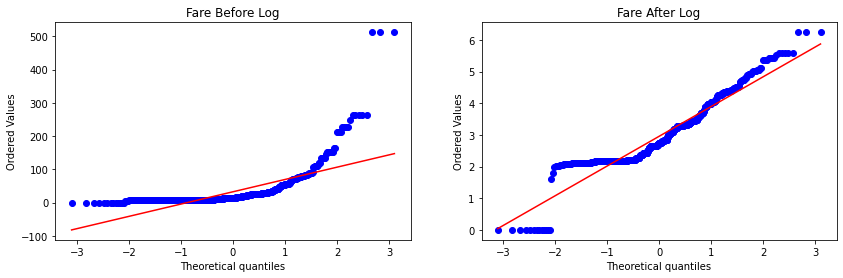

In [14]:
# By plotting the graph for fare column, before and after using LogTransformation

plt.figure(figsize = (14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist = 'norm', plot = plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist = 'norm', plot = plt)
plt.title('Fare After Log')

plt.show()

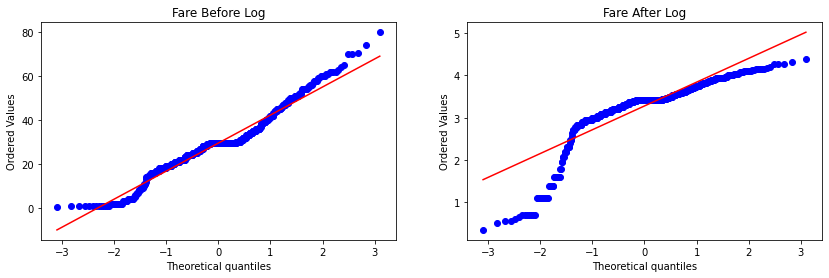

In [15]:
# By plotting the graph for age column, before and after using LogTransformation

plt.figure(figsize = (14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist = 'norm', plot = plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist = 'norm', plot = plt)
plt.title('Fare After Log')

plt.show()

Here, after using LogTransformation we found that , for the `Fare` column our distribution get some imporvement and accuracy also got improved but for the `Age` column after using transformation our distribution become poor.

So, now rather than using LogTransformation for both of the column we will only use for the `Fare` column

In [16]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder = 'passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [17]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

#@ Fit the model according to the given training data
clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)

#@ Now, predicting the data
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

#@ Checking the accuracy
print('Accuracy LR', accuracy_score(y_test, y_pred))
print('Accuracy DT', accuracy_score(y_test, y_pred2))


Accuracy LR 0.6703910614525139
Accuracy DT 0.664804469273743


In [18]:
#@ checking using CrossValidation
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_transformed2, y, scoring = 'accuracy', cv = 10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed2, y, scoring = 'accuracy', cv = 10)))


LR 0.6712609238451936
DT 0.6622097378277153


Here, we did not get that much difference although using LogTransformer.

- In a nutshell, we understood that, our 'Age' data is previously normally distributed and 'Fare' is right skewed. So, when we use LogTransform then LogisticRegression for the 'Fare'. Then, our result got imporved.

- But, using DecisionTree did not effect before using Transform or either After using Transform. (Note: Algorithm like DecisionTree didn't get effected by our data distribution,   But Algorithm like Linear Regression and Logistic Algorithm get effected)

## Applying some other transformation

In [19]:
def apply_transform(transform):
    X = data.iloc[:, 1:3]
    y = data.iloc[:, 0]
    
    trf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder = 'passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy", np.mean(cross_val_score(clf, X_trans, y, scoring = 'accuracy', cv = 10)))
    
    plt.figure(figsize = (14, 4))
    
    plt.subplot(121)
    stats.probplot(X['Fare'], dist = 'norm', plot = plt)
    plt.title('Fare Before Transform')
    
    plt.subplot(122)
    stats.probplot(X_trans[:, 0], dist = 'norm', plot = plt)
    plt.title('Fare After Transform')
    
    plt.show()

Accuracy 0.6589013732833957


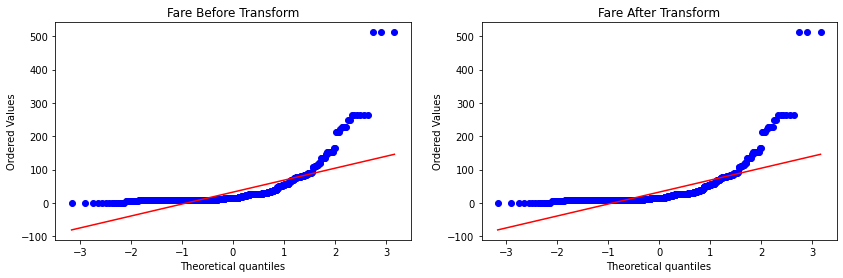

In [20]:
#@ Normal Transform
apply_transform(lambda x: x)

Accuracy 0.6442446941323345


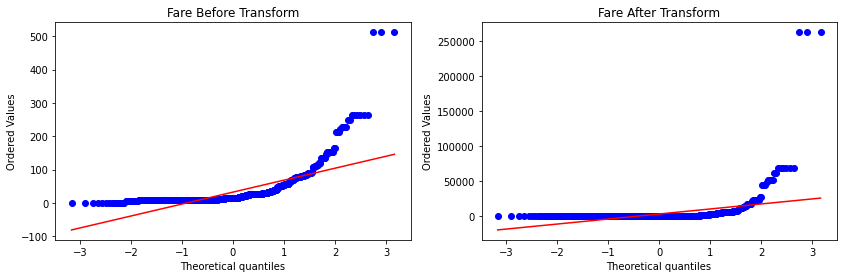

In [21]:
#@ For Square Transform
apply_transform(lambda x: x**2)

Accuracy 0.6589013732833957


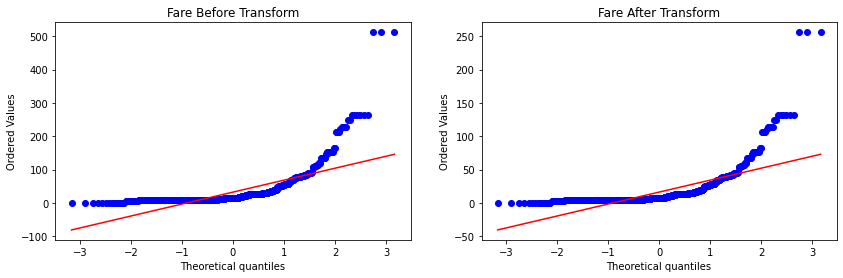

In [22]:
#@ For Square Root Transform
apply_transform(lambda x: x**1/2)

Accuracy 0.6251560549313357


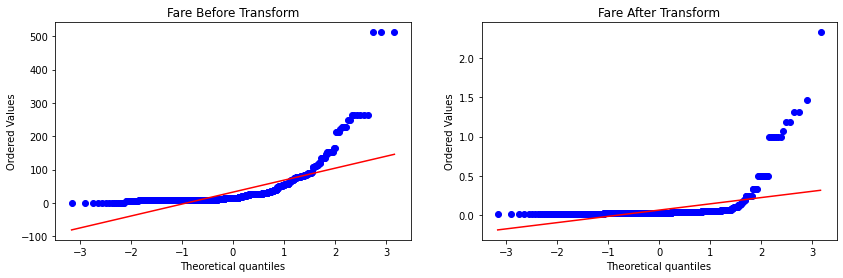

In [23]:
#@ For Reciprocal Transform
apply_transform(lambda x: 1/(X + 0.01))

Accuracy 0.6195131086142323


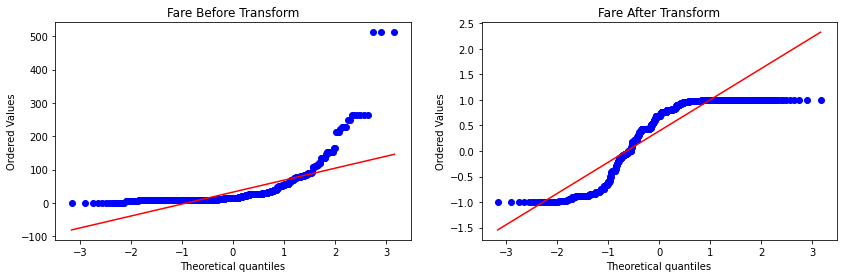

In [24]:
#@ For Sine
apply_transform(np.sin)